# Math Question Answer Verification Competition

## Starter Code

Borrowed from [official Unsloth implementation](https://colab.research.google.com/drive/1Ys44kVvmeZtnICzWz0xgpRnrIOjZAuxp?usp=sharing#scrollTo=MKX_XKs_BNZR)

In [ ]:
# %%capture
# This cell will take time
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.9/163.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.9/310.9 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Found existing installation: unsloth 2024.11.7
Uninstalling unsloth-2024.11.7:
  Successfully uninstalled unsloth-2024.11.7
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-5e_t_999/unsloth_33b60eb8ba034808a2df83e6569c2106
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-5e_t_999/unsloth_33b60eb8ba034808a2df83e6569c2106
  Resolved https://github.com/unslothai/unsloth.git to commit f26d4e739ed507de7a9088da53d10fd02f58d160
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2024.11.7-py3-none-any.whl size=163138 sha256=4ce24d568a0529bc69d648a8321bfdfadcb090588ceb5fcc2750fd31c4e85d07
  Stored in directory: /tmp/pip-ephem-wheel-cache-3h3og43k/wheels/ed/d4/e9/76fb290ee3df0a5fc21ce5c2c788e29e9607a2353d8342fd0d
Successfully built unsloth


In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 768 # Choose any
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


In [ ]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

==((====))==  Unsloth 2024.11.7: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu124. CUDA = 8.0. CUDA Toolkit = 12.4.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

## Load model and wrap with LoRA adapters

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj", "ffn_proj",
                      "multi_head_attention",
                      "attention_output",
                      "lm_head",
                      "cls_output",
                      "attention_bias",
                     ],
    lora_alpha = 32,
    lora_dropout = 0.1, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)



Unsloth: Dropout = 0 is supported for fast patching. You are using dropout = 0.1.
Unsloth will patch all other layers, except LoRA matrices, causing a performance hit.


Unsloth: You added custom modules, but Unsloth hasn't optimized for this.
Beware - your finetuning might be noticeably slower!
Unsloth: You added custom modules, but Unsloth hasn't optimized for this.
Beware - your finetuning might be noticeably slower!
Unsloth: You added custom modules, but Unsloth hasn't optimized for this.
Beware - your finetuning might be noticeably slower!
Unsloth: You added custom modules, but Unsloth hasn't optimized for this.
Beware - your finetuning might be noticeably slower!
Unsloth: You added custom modules, but Unsloth hasn't optimized for this.
Beware - your finetuning might be noticeably slower!
Unsloth: Offloading output_embeddings to disk to save VRAM


/usr/local/lib/python3.10/dist-packages/unsloth/models/_utils.py:697: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  offloaded_W = torch.load(filename, map_location = "cpu", 

Unsloth: Training lm_head in mixed precision to save VRAM


## Load dataset

In [ ]:
# download and load competition dataset

from datasets import load_dataset
dataset = load_dataset("ad6398/nyu-dl-teach-maths-comp")

# print and see dataset
dataset['train'][0]

README.md:   0%|          | 0.00/2.09k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/195M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

{'question': 'What is the radius of the circle inscribed in triangle $ABC$ if $AB = 22, AC=12,$ and $BC=14$? Express your answer in simplest radical form.',
 'is_correct': True,
 'answer': '3.16227766016838',
 'solution': "The circle is inscribed in a triangle, and we know the sides of the triangle.\nTo use the inradius formula, we need to know the area of the triangle.\nWe can use Heron's formula to calculate the area.\n<llm-code>\nimport math\nfrom sympy import *\n\nAB, AC, BC = 22, 12, 14\n\n# Calculate the semiperimeter and area using Heron's formula\ns = (AB + AC + BC) / 2\nK = sqrt(s * (s - AB) * (s - AC) * (s - BC))\n\nprint(K)\n</llm-code>\n<llm-code-output>\n75.8946638440411\n</llm-code-output>\nLet's now use the formula for the radius of the inscribed circle.\n<llm-code>\nr = K / s\nprint(r)\n</llm-code>\n<llm-code-output>\n3.16227766016838\n</llm-code-output>\nThe answer is \\boxed{3.16227766016838}"}

In [ ]:
train_ds = load_dataset("ad6398/nyu-dl-teach-maths-comp", split='train[:4%]')

import pandas as pd
from datasets import Dataset

# balance the dataset
df = pd.DataFrame(train_ds)

total = len(train_ds)
trueCnt=0
for i in range(total):
  if train_ds[i]['is_correct'] == True:
    trueCnt = trueCnt+1
print(trueCnt)

falseCnt = total - trueCnt
if falseCnt > trueCnt:
  indices_to_drop = df[df['is_correct']==False].index[:falseCnt-trueCnt]
  df = df.drop(indices_to_drop).reset_index(drop=True)
else:
  indices_to_drop = df[df['is_correct']==True].index[:trueCnt-falseCnt]
  df = df.drop(indices_to_drop).reset_index(drop=True)

train_ds = Dataset.from_pandas(df)

trueCnt = 0
for i in range(len(train_ds)):
  if train_ds[i]['is_correct'] == True:
    trueCnt = trueCnt+1
print('True sample Number: ', trueCnt, 'False sample Number: ',len(train_ds)-trueCnt)



15912
True sample Number:  15912 False sample Number:  15912


In [ ]:
train_val_split = train_ds.train_test_split(test_size=0.01, seed=42)
train_data = train_val_split["train"]
validation_data = train_val_split["test"]

# Analyze DataSet

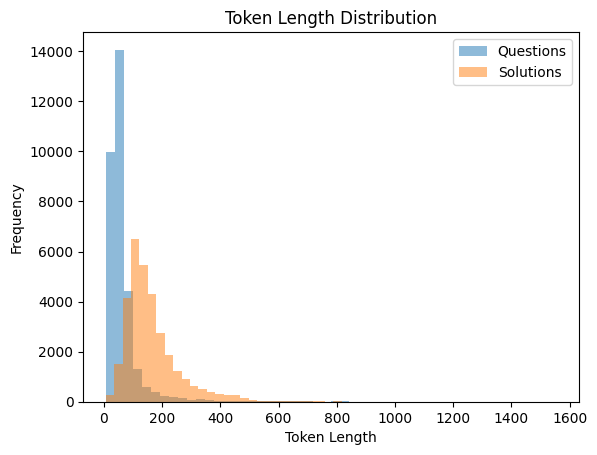

Mean question length: 62.65991075917547
95th percentile question length: 149.0
Mean solution length: 164.38351558572145
95th percentile solution length: 363.0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Analyze token lengths for the "question" and "solution" fields

question_lengths = [len(tokenizer(question)["input_ids"]) for question in train_ds["question"]]
solution_lengths = [len(tokenizer(solution)["input_ids"]) for solution in train_ds["solution"]]

# Plot token length distributions
plt.hist(question_lengths, bins=50, alpha=0.5, label="Questions")
plt.hist(solution_lengths, bins=50, alpha=0.5, label="Solutions")
plt.xlabel("Token Length")
plt.ylabel("Frequency")
plt.legend()
plt.title("Token Length Distribution")
plt.show()

# Statistics
print(f"Mean question length: {np.mean(question_lengths)}")
print(f"95th percentile question length: {np.percentile(question_lengths, 95)}")
print(f"Mean solution length: {np.mean(solution_lengths)}")
print(f"95th percentile solution length: {np.percentile(solution_lengths, 95)}")

# Prepare Training Data

In [ ]:
prompt = """You are a great mathematician and you are tasked with finding if an answer to a given maths question is correct or not.
Based on the question, solution and answer, consider whether the solution steps and logic are consistent with mathematical principles.
If the answer and solution are correct, respond with 'True'. If you find any error in the solution, or answer, respond with 'False'.


### Question:
{}

### Answer:
{}

### Solution:
{}

### Output:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    question = examples["question"]
    ans       = examples["answer"]
    solution = examples["solution"]
    output      = examples["is_correct"]
    texts = []
    for instruction, input, sol, output in zip(question, ans, solution, output):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = prompt.format(instruction, input, sol, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }

In [ ]:
# Process the training dataset and generate prompt for each datapoint
#train_dataset = dataset['train'].map(formatting_prompts_func, batched = True,)
train_dataset = train_data.map(formatting_prompts_func, batched = True,)
validation_dataset = validation_data.map(formatting_prompts_func, batched=True)

Map:   0%|          | 0/31505 [00:00<?, ? examples/s]

Map:   0%|          | 0/319 [00:00<?, ? examples/s]

In [ ]:
#print a smaple training example
train_dataset['text'][0]

"You are a great mathematician and you are tasked with finding if an answer to a given maths question is correct or not.\nBased on the question, solution and answer, consider whether the solution steps and logic are consistent with mathematical principles.\nIf the answer and solution are correct, respond with 'True'. If you find any error in the solution, or answer, respond with 'False'.\n\n\n### Question:\nA function $f$ is defined by $f(z) = i\\overline{z}$, where $i^2 = -1$ and $\\overline{z}$ is the complex conjugate of $z$. How many values of $z$ satisfy both $|z| = 5$ and $f(z) = z$?\n\n### Answer:\n5\n\n### Solution:\nTo compute this, first we calculate the complex conjugate of $f(z)$. This is equivalent to saying: $f(\\overline{z}) = \\overline{f(z)}$.\nFrom the given $f(z)$,\n$f(z) = i\\overline{z} = iz$\n$f(\\overline{z}) = i\\overline{z} = -i\\overline{z}$\nHence, we can say that, $iz = -i\\overline{z}$\nGiven $|z| = 5$, we can say that $z\\overline{z} = 25$.\nHence, we can 

## SFT

In [ ]:
from transformers import EarlyStoppingCallback

early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=200)

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

training_args = TrainingArguments(
        per_device_train_batch_size = 4,
        gradient_accumulation_steps = 4,
        # warmup_steps = 100,
        warmup_ratio = 0.03,
        num_train_epochs = 3, # Set this for 1 full training run.
        # max_steps = 2000,
        learning_rate = 4e-5,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 100,
        optim = "adamw_8bit",
        weight_decay = 0.05,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
        eval_steps=200,                # Evaluate every 10 steps
        evaluation_strategy="steps",  # Use step-based evaluation
        save_strategy="steps",        # Save the model every 10 steps
        save_steps=1000,
        save_total_limit=2,
        load_best_model_at_end=True
    )

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    eval_dataset = validation_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 4,
    packing = False, # Can make training 5x faster for short sequences.
    args = training_args,
    callbacks=[early_stopping_callback]
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Map (num_proc=4):   0%|          | 0/31505 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/319 [00:00<?, ? examples/s]

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 31,505 | Num Epochs = 3
O^O/ \_/ \    Batch size per device = 4 | Gradient Accumulation steps = 4
\        /    Total batch size = 16 | Total steps = 5,907
 "-____-"     Number of trainable parameters = 567,279,616


Step,Training Loss,Validation Loss
200,0.550400,0.621478
400,0.591500,0.603637
600,0.576800,0.590985
800,0.565100,0.579970
1000,0.552300,0.571803
1200,0.548400,0.563595
1400,0.547500,0.556113
1600,0.542800,0.549589
1800,0.533700,0.544528
2000,0.507400,0.541731


In [ ]:
model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")

('lora_model/tokenizer_config.json',
 'lora_model/special_tokens_map.json',
 'lora_model/tokenizer.json')

Further fine-tuning based on previous model

In [ ]:
from transformers import AutoModelForCausalLM

# Load the model from the latest checkpoint
model = AutoModelForCausalLM.from_pretrained("outputs/checkpoint-5907")

`low_cpu_mem_usage` was None, now default to True since model is quantized.


## Train on Completion Only

In [ ]:
from trl import DataCollatorForCompletionOnlyLM

response_template = "### Output:"
#collator = DataCollatorForCompletionOnlyLM(response_template, tokenizer=tokenizer)
collator = DataCollatorForCompletionOnlyLM(tokenizer.encode(response_template, add_special_tokens = False)[2:], tokenizer=tokenizer)

training_args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 20,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 1000,
        learning_rate = 1e-6,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 10,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
        eval_steps=20,                # Evaluate every 10 steps
        evaluation_strategy="steps",  # Use step-based evaluation
        save_strategy="steps",        # Save the model every 10 steps
        save_steps=20,
        load_best_model_at_end=True
    )


trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    eval_dataset = validation_dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 4,
    packing = False, # Can make training 5x faster for short sequences.
    args = training_args,
    data_collator=collator,
)

In [ ]:
trainer_stats = trainer.train()

In [ ]:
model.save_pretrained("lora_model_completion") # Local saving
tokenizer.save_pretrained("lora_model_completion")

## loading model

In [ ]:
if True:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference


==((====))==  Unsloth 2024.11.7: Fast Llama patching. Transformers = 4.46.2.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.5.1+cu124. CUDA = 8.0. CUDA Toolkit = 12.4.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


# Batch Inference


In [ ]:
prompt = """You are a great mathematician and you are tasked with finding if an answer to a given maths question is correct or not.
Based on the question, solution and answer, consider whether the solution steps and logic are consistent with mathematical principles.
If the answer and solution are correct, respond with 'True'. If you find any error in the solution, or answer, respond with 'False'.


### Question:
{}

### Answer:
{}

### Solution:
{}

### Output:
{}"""

def formatting_test_prompts_func(examples):
    question = examples["question"]
    ans       = examples["answer"]
    solution = examples["solution"]
    texts = []
    for instruction, input, sol in zip(question, ans, solution):
        text = prompt.format(instruction, input, sol, "")
        texts.append(text)
    return { "text" : texts, }


test_text_dataset = dataset['test'].map(formatting_test_prompts_func, batched = True,)

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
# Running inference on batch test
import gc

FastLanguageModel.for_inference(model)

test_dataset = test_text_dataset['text']
batch_size = 8
output_label = []

for i in range(0, len(test_dataset), batch_size):
    #torch.cuda.empty_cache()
    #gc.collect()

    batch = test_dataset[i:i + batch_size]

    # Tokenize batch
    inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True).to("cuda")

    with torch.no_grad():
      outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True, num_beams=1, early_stopping=True)

    # Extract only the generated part and decode
    text_generated = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    # Extract the last line (True/False) from each generated text
    for text in text_generated:
        output_label.append(text.splitlines()[-1])

    print(f"batch-num: {min(i + batch_size, len(test_dataset))}/{len(test_dataset)}")


batch-num: 8/10000
batch-num: 16/10000
batch-num: 24/10000
batch-num: 32/10000
batch-num: 40/10000
batch-num: 48/10000
batch-num: 56/10000
batch-num: 64/10000
batch-num: 72/10000
batch-num: 80/10000
batch-num: 88/10000
batch-num: 96/10000
batch-num: 104/10000
batch-num: 112/10000
batch-num: 120/10000
batch-num: 128/10000
batch-num: 136/10000
batch-num: 144/10000
batch-num: 152/10000
batch-num: 160/10000
batch-num: 168/10000
batch-num: 176/10000
batch-num: 184/10000
batch-num: 192/10000
batch-num: 200/10000
batch-num: 208/10000
batch-num: 216/10000
batch-num: 224/10000
batch-num: 232/10000
batch-num: 240/10000
batch-num: 248/10000
batch-num: 256/10000
batch-num: 264/10000
batch-num: 272/10000
batch-num: 280/10000
batch-num: 288/10000
batch-num: 296/10000
batch-num: 304/10000
batch-num: 312/10000
batch-num: 320/10000
batch-num: 328/10000
batch-num: 336/10000
batch-num: 344/10000
batch-num: 352/10000
batch-num: 360/10000
batch-num: 368/10000
batch-num: 376/10000
batch-num: 384/10000
batch

In [ ]:
print(len(output_label))

import csv

cnt = 0
csv_data = [["ID", "is_correct"]]
for i in range(len(output_label)):
  if output_label[i] == 'True':
    cnt = cnt + 1
    csv_data.append([i, True])
  else:
    csv_data.append([i, False])

# Write to CSV file
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print("successfully write to data.csv")

10000
successfully write to data.csv


In [ ]:
from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r ./lora_model.zip ./lora_model
# !zip -r ./lora_model_completion.zip ./lora_model_completion

  adding: lora_model/ (stored 0%)
  adding: lora_model/tokenizer.json (deflated 85%)
  adding: lora_model/special_tokens_map.json (deflated 71%)
  adding: lora_model/adapter_model.safetensors (deflated 20%)
  adding: lora_model/adapter_config.json (deflated 55%)
  adding: lora_model/tokenizer_config.json (deflated 96%)
  adding: lora_model/README.md (deflated 66%)


In [ ]:
files.download('lora_model.zip')
# files.download('lora_model_completion.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download the checkpoint

In [ ]:
!tar -czvf checkpoint-5800.tar.gz outputs/checkpoint-5907

outputs/checkpoint-5907/
outputs/checkpoint-5907/trainer_state.json
outputs/checkpoint-5907/tokenizer.json
outputs/checkpoint-5907/special_tokens_map.json
outputs/checkpoint-5907/adapter_model.safetensors
outputs/checkpoint-5907/training_args.bin
outputs/checkpoint-5907/adapter_config.json
outputs/checkpoint-5907/tokenizer_config.json
outputs/checkpoint-5907/README.md
outputs/checkpoint-5907/optimizer.pt
outputs/checkpoint-5907/rng_state.pth
outputs/checkpoint-5907/scheduler.pt


In [ ]:
from google.colab import files
files.download("checkpoint-5800.tar.gz")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy the checkpoint to Google Drive
!cp checkpoint-5800.tar.gz /content/drive/MyDrive/

Mounted at /content/drive
